# DTU Weather station notebook

In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_folder = "."
file_name = "ClimateStationData.csv"

In [3]:
df = pd.read_csv(os.path.join(data_folder, file_name), parse_dates=[0])

In [4]:
df

,Time(utc),GHI,DHI,DNI,LWD,wind_dir_min,wind_dir_avg,wind_dir_max,wind_speed_min,wind_speed_avg,wind_speed_max,air_temperature,relative_humidity,air_pressure,rain_accumulation,rain_duration,rain_intensity,hail_accumulation,hail_duration,hail_intensity
0,2018-03-01 00:59:00,-0.7824,-0.6311,-0.06106,-0.06106,62.08,68.27,82.40,4.128,5.007,5.875,-7.100,63.04,1026.0,0.00,0.6667,0.0,0.0,0.0,0.0
1,2018-03-01 01:59:00,-0.8079,-0.6177,-0.05233,-0.05233,58.53,59.42,72.42,3.227,3.853,4.550,-6.890,62.67,1025.0,0.00,0.3333,0.0,0.0,0.0,0.0
2,2018-03-01 02:59:00,-0.7279,-0.5249,-0.07558,-0.07558,50.57,57.02,69.92,4.343,5.310,6.228,-6.943,64.67,1024.0,0.00,2.3330,0.0,0.0,0.0,0.0
3,2018-03-01 03:59:00,-0.7625,-0.5708,-0.08724,-0.08724,45.35,55.90,66.38,4.475,5.318,6.150,-7.422,68.67,1024.0,0.01,1.5000,0.0,0.0,0.0,0.0
4,2018-03-01 04:59:00,-0.9691,-0.7296,-0.12870,-0.12870,66.67,58.07,67.82,3.125,3.933,4.758,-7.898,69.88,1023.0,0.00,0.8333,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,2019-03-20 19:59:00,-2.1090,-2.1980,-0.71480,269.70000,259.60,271.60,281.70,1.788,2.172,2.518,6.898,89.26,1022.0,0.00,0.0000,0.0,0.0,0.0,0.0
9236,2019-03-20 20:59:00,-1.2170,-1.2990,-0.42830,301.10000,261.60,274.00,285.50,1.818,2.187,2.587,6.580,90.70,1022.0,0.00,0.0000,0.0,0.0,0.0,0.0
9237,2019-03-20 21:59:00,-1.0540,-1.0980,-0.37440,307.50000,253.10,265.20,277.50,2.313,2.837,3.332,6.375,90.95,1023.0,0.00,0.0000,0.0,0.0,0.0,0.0
9238,2019-03-20 22:59:00,-0.4087,-0.4064,0.01380,339.90000,249.20,257.50,265.90,2.695,3.117,3.560,6.328,91.29,1023.0,0.00,0.0000,0.0,0.0,0.0,0.0


# Data analysis stuff

## Temperature

In [5]:
df.air_temperature.max()

538.1

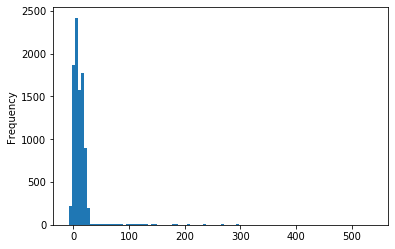

In [6]:
df.air_temperature.plot(kind='hist', bins = 100)


So clearly we have some outliers that needs cleaning up.
The highest measured temperature in DK is 36.4 Celsius (https://www.dmi.dk/vejrarkiv/vejrekstremer-danmark/ or https://en.wikipedia.org/wiki/List_of_extreme_temperatures_in_Denmark)
Hence i choose to see temperatures over 40 Celsius to be erros and look into replcing these values.

In [7]:
temp_idx = df.air_temperature[df.air_temperature > 40].index
shifted_temp_idx1 = temp_idx[:-1]
shifted_temp_idx2 = temp_idx[1:]
split_idx = (shifted_temp_idx1+1 != shifted_temp_idx2).nonzero()[0]
split_idx_arrs = np.split(ary=temp_idx, indices_or_sections = split_idx+1)

In [8]:
len(temp_idx)

266

In [9]:
split_idx_arrs

[Int64Index([1517, 1518, 1519, 1520, 1521, 1522, 1523, 1524, 1525, 1526, 1527,
             1528, 1529],
            dtype='int64'),
 Int64Index([1541, 1542, 1543, 1544, 1545, 1546, 1547, 1548, 1549, 1550, 1551,
             1552],
            dtype='int64'),
 Int64Index([1564, 1565, 1566, 1567, 1568, 1569, 1570, 1571, 1572, 1573, 1574,
             1575, 1576],
            dtype='int64'),
 Int64Index([1588, 1589, 1590, 1591, 1592, 1593, 1594, 1595, 1596, 1597, 1598,
             1599, 1600, 1601],
            dtype='int64'),
 Int64Index([1613, 1614, 1615, 1616, 1617, 1618, 1619, 1620, 1621, 1622, 1623,
             1624],
            dtype='int64'),
 Int64Index([1661, 1662, 1663, 1664, 1665, 1666, 1667, 1668, 1669, 1670, 1671,
             1672],
            dtype='int64'),
 Int64Index([1684, 1685, 1686, 1687, 1688, 1689, 1690, 1691, 1692, 1693, 1694,
             1695, 1696, 1697],
            dtype='int64'),
 Int64Index([1708, 1709, 1710, 1711, 1712, 1713, 1714, 1715, 1716, 1717, 17

So as can be seen we have 266 error temperatures and most of the errors happen between index 1517 and 1999. Most of the errors comes in sequences of ~12 faulty measurements. This seems like a systematic measurement mistake. This means that we have no good data to extrapolate from around around most of the errors. Hence it would require a model to infer these missing values. As we are only talking about 266 I will remove them for now.

In [10]:
df.air_temperature.iloc[temp_idx] = np.NaN

/home/mathias/Dropbox/Uni/Speciale/code/nf-env/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


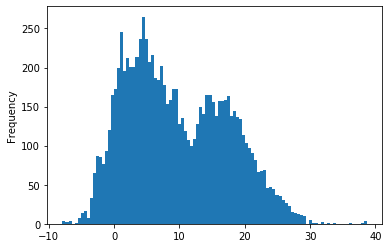

In [11]:
df.air_temperature.plot(kind='hist', bins = 100)


## Wind dir

The wind direction is given in degrees. Hence it can't be over 360 or less than 0

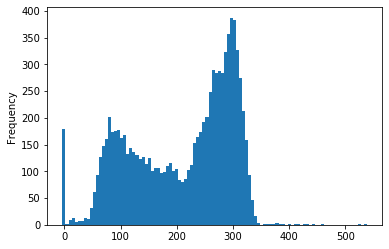

In [12]:
df.wind_dir_avg.plot(kind='hist', bins=100)

In [13]:
df[df.wind_dir_avg > 360]

,Time(utc),GHI,DHI,DNI,LWD,wind_dir_min,wind_dir_avg,wind_dir_max,wind_speed_min,wind_speed_avg,wind_speed_max,air_temperature,relative_humidity,air_pressure,rain_accumulation,rain_duration,rain_intensity,hail_accumulation,hail_duration,hail_intensity
1523,2018-05-03 11:59:00,630.8,397.80,397.8,397.8,397.8,397.8,397.8,397.8,397.8,397.8,NaN,397.8,397.8,23870.0,397.8,397.8,23870.0,397.8,397.8
1545,2018-05-04 09:59:00,494.1,377.40,377.4,377.4,377.4,377.4,377.4,377.4,377.4,377.4,NaN,377.4,377.4,22640.0,377.4,377.4,22640.0,377.4,377.4
1546,2018-05-04 10:59:00,366.9,360.20,360.2,360.2,360.2,360.2,360.2,360.2,360.2,360.2,NaN,360.2,360.2,21610.0,360.2,360.2,21610.0,360.2,360.2
1711,2018-05-11 07:59:00,494.7,364.90,364.9,364.9,364.9,364.9,364.9,364.9,364.9,364.9,NaN,364.9,364.9,21890.0,364.9,364.9,21890.0,364.9,364.9
1713,2018-05-11 09:59:00,612.6,383.70,383.7,383.7,383.7,383.7,383.7,383.7,383.7,383.7,NaN,383.7,383.7,23020.0,383.7,383.7,23020.0,383.7,383.7
1714,2018-05-11 10:59:00,613.3,525.40,525.4,525.4,525.4,525.4,525.4,525.4,525.4,525.4,NaN,525.4,525.4,31520.0,525.4,525.4,31520.0,525.4,525.4
1715,2018-05-11 11:59:00,421.2,415.40,415.4,415.4,415.4,415.4,415.4,415.4,415.4,415.4,NaN,415.4,415.4,24930.0,415.4,415.4,24930.0,415.4,415.4
1716,2018-05-11 12:59:00,438.9,435.10,435.1,435.1,435.1,435.1,435.1,435.1,435.1,435.1,NaN,435.1,435.1,26100.0,435.1,435.1,26100.0,435.1,435.1
1717,2018-05-11 13:59:00,456.2,413.30,413.3,413.3,413.3,413.3,413.3,413.3,413.3,413.3,NaN,413.3,413.3,24800.0,413.3,413.3,24800.0,413.3,413.3
1739,2018-05-12 11:59:00,628.0,377.00,377.0,377.0,377.0,377.0,377.0,377.0,377.0,377.0,NaN,377.0,377.0,22620.0,377.0,377.0,22620.0,377.0,377.0


Note how all of these observations have bad air_temperature as well. Further more notice how most observations have dplicated values across the columns - clearly something has gone wrong here as well

In [14]:
neg_idx = df[df.wind_dir_avg < 0].index
df[df.wind_dir_avg < 0]

,Time(utc),GHI,DHI,DNI,LWD,wind_dir_min,wind_dir_avg,wind_dir_max,wind_speed_min,wind_speed_avg,wind_speed_max,air_temperature,relative_humidity,air_pressure,rain_accumulation,rain_duration,rain_intensity,hail_accumulation,hail_duration,hail_intensity
1512,2018-05-03 00:59:00,-2.969,-2.4440,-2.4160,-2.4160,-0.5927,-0.4927,-0.3593,-2.3690,-2.3680,-2.3660,-2.2830,-1.4140,14.3600,-144.60,-2.4090,-2.4090,-144.60,-2.4090,-2.4090
1513,2018-05-03 01:59:00,-2.925,-2.3540,-2.3540,-2.3540,-2.3540,-2.3540,-2.3540,-2.3540,-2.3540,-2.3540,-2.3540,-2.3540,-2.3540,-141.20,-2.3540,-2.3540,-141.20,-2.3540,-2.3540
1514,2018-05-03 02:59:00,-1.200,-0.9968,-0.9968,-0.9968,-0.9968,-0.9968,-0.9968,-0.9968,-0.9968,-0.9968,-0.9968,-0.9968,-0.9968,-59.81,-0.9968,-0.9968,-59.81,-0.9968,-0.9968
1531,2018-05-03 19:59:00,-3.158,-2.8300,-2.8300,-2.8300,-2.8300,-2.8300,-2.8300,-2.8300,-2.8300,-2.8300,-2.8300,-2.8300,-2.8300,-169.80,-2.8300,-2.8300,-169.80,-2.8300,-2.8300
1532,2018-05-03 20:59:00,-3.445,-3.0990,-3.0990,-3.0990,-3.0990,-3.0990,-3.0990,-3.0990,-3.0990,-3.0990,-3.0990,-3.0990,-3.0990,-186.00,-3.0990,-3.0990,-186.00,-3.0990,-3.0990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,2018-05-22 21:59:00,-2.301,-3.1800,-3.1800,-3.1800,-3.1800,-3.1800,-3.1800,-3.1800,-3.1800,-3.1800,-3.1800,-3.1800,-3.1800,-190.80,-3.1800,-3.1800,-190.80,-3.1800,-3.1800
1990,2018-05-22 22:59:00,-2.476,-2.6160,-2.6160,-2.6160,-2.6160,-2.6160,-2.6160,-2.6160,-2.6160,-2.6160,-2.6160,-2.6160,-2.6160,-156.90,-2.6160,-2.6160,-156.90,-2.6160,-2.6160
1991,2018-05-22 23:59:00,-3.042,-2.7950,-2.7950,-2.7950,-2.7950,-2.7950,-2.7950,-2.7950,-2.7950,-2.7950,-2.7950,-2.7950,-2.7950,-167.70,-2.7950,-2.7950,-167.70,-2.7950,-2.7950
1992,2018-05-23 00:59:00,-3.017,-2.2680,-2.2680,-2.2680,-2.2230,-2.2230,-2.2230,-2.2230,-2.2230,-2.2230,-2.2230,-2.2230,-2.2230,-133.40,-2.2230,-2.2230,-133.40,-2.2230,-2.2230


Notice how all of the observations hare again have the duplicated value problem. Also all of the values are negative - which makes no sense for some of them i.e. negative rain fall

Due to the problems denoted above i choose to invalidate all of the found observations

In [15]:
wind_idx = (df.wind_dir_avg < 0) | (df.wind_dir_avg > 360)

In [16]:
wind_idx = df.wind_dir_avg[wind_idx].index

In [17]:
df.wind_dir_avg[wind_idx] = np.NAN

/home/mathias/Dropbox/Uni/Speciale/code/nf-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


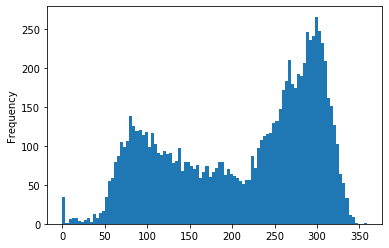

In [18]:
df.wind_dir_avg.plot(kind='hist', bins=100)

Now the wind direction looks much more plausible,

## Wind speed

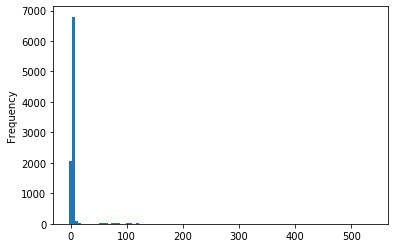

In [19]:
df.wind_speed_avg.plot(kind='hist', bins=100)

In [20]:
df.wind_speed_avg.max()

538.1

Again note that the highest wind speed measured in Denmark is 39.5 m/s and 53 m/s for gusts. (again from DMI). So clearly we have some errors again.
Furthermore that max value here is exactly the same value we saw for max temperature - seems fishy

The data should be over an hour so I set the max value to be 40 m/s

In [21]:
speed_idx = df[df.wind_speed_avg > 40].index

In [22]:
len(speed_idx)

266

In [23]:
speed_idx == temp_idx

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

Note that all of the error observations are exactly the same we found for temp. So we will remove them all

In [24]:
len(df[df.wind_speed_avg < 0])

145

In [25]:
df[df.wind_speed_avg < 0].index == neg_idx

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

And the obs with negative values corresponds with the obs we wound earlier. So we will remove those as well

In [26]:
speed_idx2 = (df.wind_speed_avg < 0) | (df.wind_speed_avg > 40)

In [27]:
df.wind_speed_avg[speed_idx2] = np.NaN

/home/mathias/Dropbox/Uni/Speciale/code/nf-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


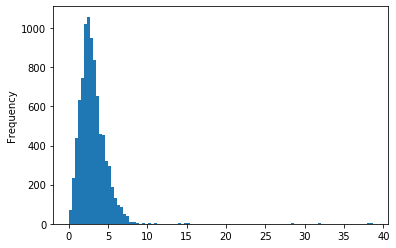

In [28]:
df.wind_speed_avg.plot(kind='hist', bins=100)

Looks better - Some observations still looks a bit like outliers but they are atleast historically plausible now

## Rain duration

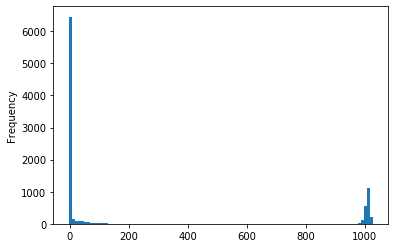

In [29]:
df.rain_duration.plot(kind='hist', bins=100)

In [30]:
df.rain_duration.max()

1028.0

Rain duration looks weird as well. The measuring instrument measures each 10 second increment it rains per hour. Hence the maximum should be 360.

In [31]:
(df.rain_duration > 360).sum()

2059

This means that 2059 observations are faulty - This seems like quite a high number. However we will have to invalidate them

In [32]:
bad_rain_idx = df[df.rain_duration > 360].index

In [33]:
df.rain_duration[bad_rain_idx] = np.NaN

/home/mathias/Dropbox/Uni/Speciale/code/nf-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


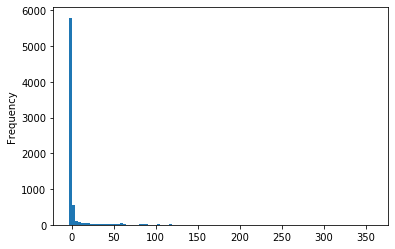

In [34]:
df.rain_duration.plot(kind='hist', bins=100)

In [35]:
df.rain_duration.max()

358.7

In [36]:
good_rain = (df.rain_duration.notna())
zero_rain = (df.rain_duration == 0)
non_zero_rain = (df.rain_duration > 0)

In [37]:
print(f"n good rain obs: {good_rain.sum()}")
print(f"n zero rain obs: {zero_rain.sum()}")
print(f"n non zero rain obs: {non_zero_rain.sum()}")
print(f"Percentage of time it rains: {non_zero_rain.sum() / good_rain.sum()}")

n good rain obs: 7181
n zero rain obs: 5646
n non zero rain obs: 1389
Percentage of time it rains: 0.19342709928979251


So after cleaning it seems like it rains at least some around 1/5 of all hours - seems plausible i think.

## Rain fall

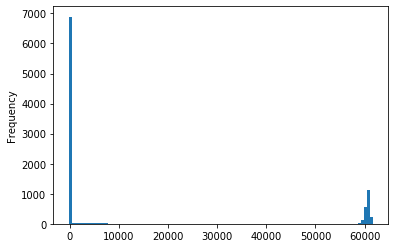

In [38]:
df.rain_accumulation.plot(kind='hist', bins=100)

In [39]:
df.rain_accumulation.max()

61680.0

Seems like it has the same error as rain duration just scaled. So I try to remove the same observations as before

In [40]:
df.rain_accumulation[~good_rain] = np.NaN

/home/mathias/Dropbox/Uni/Speciale/code/nf-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


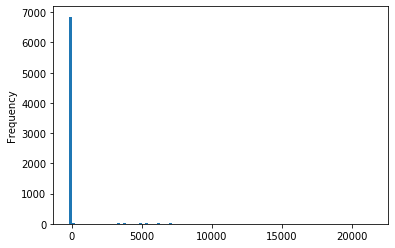

In [41]:
df.rain_accumulation.plot(kind='hist', bins=100)

In [42]:
df.rain_accumulation.max()

21520.0

So it seems like we removed weird outliers again

In [43]:
good_accu = (df.rain_accumulation.notna())
zero_accu = (df.rain_accumulation == 0)
non_zero_accu = (df.rain_accumulation > 0)

In [44]:
print(f"n good rain obs: {good_accu.sum()}")
print(f"n zero rain obs: {zero_accu.sum()}")
print(f"n non zero rain obs: {non_zero_accu.sum()}")
print(f"Percentage of time it rains: {non_zero_accu.sum() / good_accu.sum()}")

n good rain obs: 7181
n zero rain obs: 5987
n non zero rain obs: 1048
Percentage of time it rains: 0.14594067678596295


So after removing the observations corresponding to bad rain duration observations the data looks much better. 
Worth noting is that there is 341 observations where it has rained but the rain accumulation is 0. This could entirely plausible if the station can detect such weak rain that the accumulation over an hour is less than 0.01 mm - this correspond to less than 0.01 liter pr. square meter, I don't know if this is likely.

In [45]:
print(f"Average rain duration of normal raining obs: {df.rain_duration[non_zero_rain].mean()}")
print(f"Average rain duration of no accumulation raining obs: {df.rain_duration[non_zero_rain & ~non_zero_accu].mean()}")

print(f"Average rain intensity of normal raining obs: {df.rain_intensity[good_rain].mean()}")
print(f"Average rain intensity of no accumulation raining obs: {df.rain_intensity[non_zero_rain & ~non_zero_accu].mean()}")

Average rain duration of normal raining obs: 33.65417884089273
Average rain duration of no accumulation raining obs: 0.6280695014662756
Average rain intensity of normal raining obs: 4.596588729285616
Average rain intensity of no accumulation raining obs: 0.000405692082111437


So we can see that when it rains without any measured accumulation its because on average it rains less and less intensely at those observations - seems right.

# Rain intensity

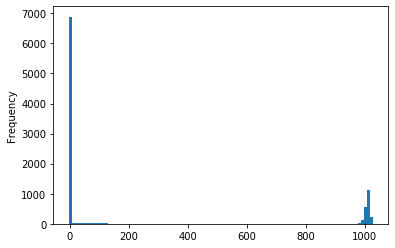

In [46]:
df.rain_intensity.plot(kind='hist', bins=100)

In [47]:
df.rain_intensity.max()

1028.0

We again have the same problem, so we try te same fix

In [48]:
df.rain_intensity[~good_rain] = np.NaN

/home/mathias/Dropbox/Uni/Speciale/code/nf-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


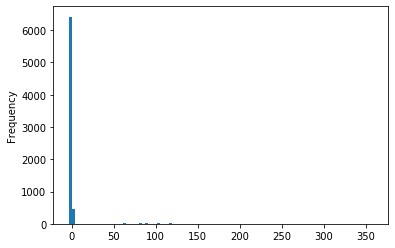

In [49]:
df.rain_intensity.plot(kind='hist', bins=100)

In [50]:
df.rain_intensity.max()

358.7

So again the plot seems better. However we get exactly the same value for the maximal rain_duration and rain_intensity. This seems fishy

In [51]:
(df.rain_intensity[non_zero_rain].values == df.rain_duration[non_zero_rain].values).sum() / (non_zero_rain).sum()

0.21814254859611232

So for 21% of all the good non-zero observatons the duration and intensity is exacly the same. Seems to systematic to be chance

In [52]:
rain_eq_duration = df.rain_intensity[non_zero_rain].values == df.rain_duration[non_zero_rain].values
df[non_zero_rain][rain_eq_duration]

,Time(utc),GHI,DHI,DNI,LWD,wind_dir_min,wind_dir_avg,wind_dir_max,wind_speed_min,wind_speed_avg,wind_speed_max,air_temperature,relative_humidity,air_pressure,rain_accumulation,rain_duration,rain_intensity,hail_accumulation,hail_duration,hail_intensity
1515,2018-05-03 03:59:00,1.664,1.727,1.727,1.727,1.727,1.727,1.727,1.727,1.727,1.727,1.727,1.727,1.727,103.6,1.727,1.727,103.6,1.727,1.727
1516,2018-05-03 04:59:00,9.828,10.080,10.080,10.080,10.080,10.080,10.080,10.080,10.080,10.080,10.080,10.080,10.080,604.5,10.080,10.080,604.5,10.080,10.080
1517,2018-05-03 05:59:00,63.630,64.910,64.910,64.910,64.910,64.910,64.910,64.910,NaN,64.910,NaN,64.910,64.910,3895.0,64.910,64.910,3895.0,64.910,64.910
1518,2018-05-03 06:59:00,329.600,130.000,130.000,130.000,130.000,130.000,130.000,130.000,NaN,130.000,NaN,130.000,130.000,7801.0,130.000,130.000,7801.0,130.000,130.000
1519,2018-05-03 07:59:00,494.100,216.800,216.800,216.800,216.800,216.800,216.800,216.800,NaN,216.800,NaN,216.800,216.800,13010.0,216.800,216.800,13010.0,216.800,216.800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1996,2018-05-23 04:59:00,150.500,50.980,50.980,50.980,50.980,50.980,50.980,50.980,NaN,50.980,NaN,50.980,50.980,3059.0,50.980,50.980,3059.0,50.980,50.980
1997,2018-05-23 05:59:00,283.000,65.930,65.930,65.930,65.930,65.930,65.930,65.930,NaN,65.930,NaN,65.930,65.930,3956.0,65.930,65.930,3956.0,65.930,65.930
1998,2018-05-23 06:59:00,312.900,121.000,121.000,121.000,121.000,121.000,121.000,121.000,NaN,121.000,NaN,121.000,121.000,7260.0,121.000,121.000,7260.0,121.000,121.000
1999,2018-05-23 07:59:00,541.700,95.040,95.040,95.040,193.300,188.700,177.900,53.340,NaN,53.820,NaN,72.320,561.000,3140.0,52.340,52.340,3140.0,52.340,52.340


Looking at this we can see that for alot of observations where the rain duration and intensity is the same in fact all of the observation is the same.
I add another check of whether the relative humidity and air pressure is the same - which I believe is really unlikely to happen normally

In [53]:
humidity_eq_pressure = df.relative_humidity[non_zero_rain][rain_eq_duration].values == df.air_pressure[non_zero_rain][rain_eq_duration].values
humidity_eq_pressure

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

As can be seen it is in fact only the last two observations where it's not a completely systematic error.
we take a closer look

In [54]:
df[non_zero_rain][rain_eq_duration][~humidity_eq_pressure]

,Time(utc),GHI,DHI,DNI,LWD,wind_dir_min,wind_dir_avg,wind_dir_max,wind_speed_min,wind_speed_avg,wind_speed_max,air_temperature,relative_humidity,air_pressure,rain_accumulation,rain_duration,rain_intensity,hail_accumulation,hail_duration,hail_intensity
1999,2018-05-23 07:59:00,541.7,95.04,95.04,95.04,193.3,188.7,177.9,53.34,NaN,53.82,NaN,72.32,561.0,3140.0,52.34,52.34,3140.0,52.34,52.34
6009,2018-11-06 09:59:00,205.1,80.73,465.50,465.50,375.3,NaN,398.1,240.50,NaN,241.00,NaN,280.90,758.5,14390.0,239.80,239.80,14390.0,239.80,239.80


However we note that for both of these observations both temperature and wind speed has invalidated the observation earlier so we spend no more time on it.

Out of curiousity we check how many of the observations with the systematic fill has not been caught before.

In [55]:
len(df[non_zero_rain][rain_eq_duration][humidity_eq_pressure].dropna())

56

Not too many actually.

We invalidate the systematic error observations

In [56]:
systematic_idx = df[non_zero_rain][rain_eq_duration][humidity_eq_pressure].index
systematic_idx

Int64Index([1515, 1516, 1517, 1518, 1519, 1520, 1521, 1522, 1524, 1525,
            ...
            1983, 1984, 1985, 1986, 1987, 1994, 1995, 1996, 1997, 1998],
           dtype='int64', length=301)

In [57]:
df.rain_intensity[systematic_idx] = np.NaN

/home/mathias/Dropbox/Uni/Speciale/code/nf-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [58]:
df[non_zero_rain][rain_eq_duration][humidity_eq_pressure]

,Time(utc),GHI,DHI,DNI,LWD,wind_dir_min,wind_dir_avg,wind_dir_max,wind_speed_min,wind_speed_avg,wind_speed_max,air_temperature,relative_humidity,air_pressure,rain_accumulation,rain_duration,rain_intensity,hail_accumulation,hail_duration,hail_intensity
1515,2018-05-03 03:59:00,1.6640,1.7270,1.7270,1.7270,1.7270,1.7270,1.7270,1.7270,1.7270,1.7270,1.7270,1.7270,1.7270,103.6,1.7270,NaN,103.6,1.7270,1.7270
1516,2018-05-03 04:59:00,9.8280,10.0800,10.0800,10.0800,10.0800,10.0800,10.0800,10.0800,10.0800,10.0800,10.0800,10.0800,10.0800,604.5,10.0800,NaN,604.5,10.0800,10.0800
1517,2018-05-03 05:59:00,63.6300,64.9100,64.9100,64.9100,64.9100,64.9100,64.9100,64.9100,NaN,64.9100,NaN,64.9100,64.9100,3895.0,64.9100,NaN,3895.0,64.9100,64.9100
1518,2018-05-03 06:59:00,329.6000,130.0000,130.0000,130.0000,130.0000,130.0000,130.0000,130.0000,NaN,130.0000,NaN,130.0000,130.0000,7801.0,130.0000,NaN,7801.0,130.0000,130.0000
1519,2018-05-03 07:59:00,494.1000,216.8000,216.8000,216.8000,216.8000,216.8000,216.8000,216.8000,NaN,216.8000,NaN,216.8000,216.8000,13010.0,216.8000,NaN,13010.0,216.8000,216.8000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,2018-05-23 02:59:00,-0.4705,0.1783,0.1783,0.1783,0.1783,0.1783,0.1783,0.1783,0.1783,0.1783,0.1783,0.1783,0.1783,10.7,0.1783,NaN,10.7,0.1783,0.1783
1995,2018-05-23 03:59:00,42.7200,22.0400,22.0400,22.0400,22.0400,22.0400,22.0400,22.0400,22.0400,22.0400,22.0400,22.0400,22.0400,1323.0,22.0400,NaN,1323.0,22.0400,22.0400
1996,2018-05-23 04:59:00,150.5000,50.9800,50.9800,50.9800,50.9800,50.9800,50.9800,50.9800,NaN,50.9800,NaN,50.9800,50.9800,3059.0,50.9800,NaN,3059.0,50.9800,50.9800
1997,2018-05-23 05:59:00,283.0000,65.9300,65.9300,65.9300,65.9300,65.9300,65.9300,65.9300,NaN,65.9300,NaN,65.9300,65.9300,3956.0,65.9300,NaN,3956.0,65.9300,65.9300


## Hail obs

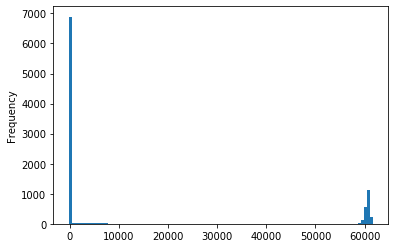

In [59]:
df.hail_accumulation.plot(kind='hist', bins=100)

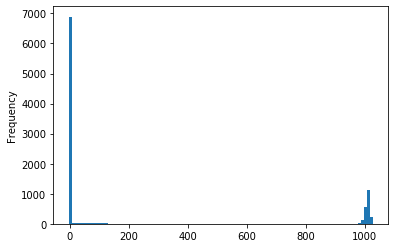

In [60]:
df.hail_intensity.plot(kind='hist', bins=100)

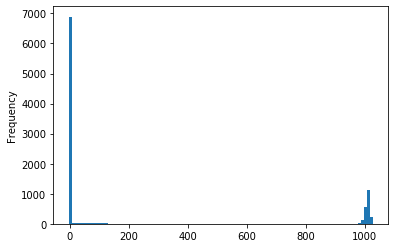

In [61]:
df.hail_duration.plot(kind='hist', bins=100)

So hail seems to have same problem as rainfall. So we will remove NaN (bad observations) first

# Removing NaN rows to see if it helps with rain and hail

In [62]:
no_nan_df = df.dropna()

In [63]:
non_zero_hail = no_nan_df.hail_duration > 0
(non_zero_hail).sum()

3

In [64]:
(no_nan_df.hail_intensity > 0).sum()

3

In [65]:
(no_nan_df.hail_accumulation > 0).sum()

2

So after removing bad observations we only have 3 observations of hail left. I don't now how often it hails but it seems like quite low.

## Cleaned data recap

So after cleaning the data we have this data left:

In [66]:
no_nan_df

,Time(utc),GHI,DHI,DNI,LWD,wind_dir_min,wind_dir_avg,wind_dir_max,wind_speed_min,wind_speed_avg,wind_speed_max,air_temperature,relative_humidity,air_pressure,rain_accumulation,rain_duration,rain_intensity,hail_accumulation,hail_duration,hail_intensity
0,2018-03-01 00:59:00,-0.7824,-0.6311,-0.06106,-0.06106,62.08,68.27,82.40,4.128,5.007,5.875,-7.100,63.04,1026.0,0.00,0.6667,0.0,0.0,0.0,0.0
1,2018-03-01 01:59:00,-0.8079,-0.6177,-0.05233,-0.05233,58.53,59.42,72.42,3.227,3.853,4.550,-6.890,62.67,1025.0,0.00,0.3333,0.0,0.0,0.0,0.0
2,2018-03-01 02:59:00,-0.7279,-0.5249,-0.07558,-0.07558,50.57,57.02,69.92,4.343,5.310,6.228,-6.943,64.67,1024.0,0.00,2.3330,0.0,0.0,0.0,0.0
3,2018-03-01 03:59:00,-0.7625,-0.5708,-0.08724,-0.08724,45.35,55.90,66.38,4.475,5.318,6.150,-7.422,68.67,1024.0,0.01,1.5000,0.0,0.0,0.0,0.0
4,2018-03-01 04:59:00,-0.9691,-0.7296,-0.12870,-0.12870,66.67,58.07,67.82,3.125,3.933,4.758,-7.898,69.88,1023.0,0.00,0.8333,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,2019-03-20 19:59:00,-2.1090,-2.1980,-0.71480,269.70000,259.60,271.60,281.70,1.788,2.172,2.518,6.898,89.26,1022.0,0.00,0.0000,0.0,0.0,0.0,0.0
9236,2019-03-20 20:59:00,-1.2170,-1.2990,-0.42830,301.10000,261.60,274.00,285.50,1.818,2.187,2.587,6.580,90.70,1022.0,0.00,0.0000,0.0,0.0,0.0,0.0
9237,2019-03-20 21:59:00,-1.0540,-1.0980,-0.37440,307.50000,253.10,265.20,277.50,2.313,2.837,3.332,6.375,90.95,1023.0,0.00,0.0000,0.0,0.0,0.0,0.0
9238,2019-03-20 22:59:00,-0.4087,-0.4064,0.01380,339.90000,249.20,257.50,265.90,2.695,3.117,3.560,6.328,91.29,1023.0,0.00,0.0000,0.0,0.0,0.0,0.0


So after the cleaning we have 6733 observations left

We will look a bit into if the errors are randomly located or if there is some systematic error that have led to the errors

In [67]:
idx = no_nan_df.index
shifted_temp_idx1 = idx[:-1]
shifted_temp_idx2 = idx[1:]
split_idx = (shifted_temp_idx1+1 != shifted_temp_idx2).nonzero()[0]
split_idx_arrs = np.split(ary=idx, indices_or_sections = split_idx+1)

In [68]:
split_idx_arrs

[Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
             ...
             1502, 1503, 1504, 1505, 1506, 1507, 1508, 1509, 1510, 1511],
            dtype='int64', length=1512),
 Int64Index([1632, 1633, 1634, 1635, 1636, 1637, 1638, 1639, 1640, 1641, 1642,
             1643, 1644, 1645, 1646, 1647, 1648, 1649, 1650, 1651, 1652, 1653,
             1654, 1655],
            dtype='int64'),
 Int64Index([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
             ...
             3950, 3951, 3952, 3953, 3954, 3955, 3956, 3957, 3958, 3959],
            dtype='int64', length=1960),
 Int64Index([6000, 6001, 6002, 6003, 6004, 6005, 6006, 6007, 6008], dtype='int64'),
 Int64Index([6012, 6013, 6014, 6015, 6016, 6017, 6018, 6019, 6020, 6021,
             ...
             9230, 9231, 9232, 9233, 9234, 9235, 9236, 9237, 9238, 9239],
            dtype='int64', length=3228)]

In [69]:
dates = df['Time(utc)'].values

In [70]:
for arr in split_idx_arrs:
    arr_start = dates[arr[0]]
    arr_end = dates[arr[-1]]
    print(f"From {arr_start}({arr[0]}) to {arr_end}({arr[-1]}) is good \n")

From 2018-03-01T00:59:00.000000000(0) to 2018-05-02T23:59:00.000000000(1511) is good 

From 2018-05-08T00:59:00.000000000(1632) to 2018-05-08T23:59:00.000000000(1655) is good 

From 2018-05-23T08:59:00.000000000(2000) to 2018-08-12T23:59:00.000000000(3959) is good 

From 2018-11-06T00:59:00.000000000(6000) to 2018-11-06T08:59:00.000000000(6008) is good 

From 2018-11-06T12:59:00.000000000(6012) to 2019-03-20T23:59:00.000000000(9239) is good 



In [71]:
for i in range(1, len(split_idx_arrs)):
    print(i)
    start_idx = split_idx_arrs[i-1][-1]
    start_date = dates[start_idx]
    
    end_idx = split_idx_arrs[i][0]
    end_date = dates[end_idx]
    print(f"Between {start_date}({start_idx}) and {end_date}({end_idx}) the observations are bad \n")

1
Between 2018-05-02T23:59:00.000000000(1511) and 2018-05-08T00:59:00.000000000(1632) the observations are bad 

2
Between 2018-05-08T23:59:00.000000000(1655) and 2018-05-23T08:59:00.000000000(2000) the observations are bad 

3
Between 2018-08-12T23:59:00.000000000(3959) and 2018-11-06T00:59:00.000000000(6000) the observations are bad 

4
Between 2018-11-06T08:59:00.000000000(6008) and 2018-11-06T12:59:00.000000000(6012) the observations are bad 



So we have that there is 5 good streaks of observations with 4 streaks of bad observations between them.
One of the bad streaks is only 4 observations though.

However it is worth noting that we have around 6 + 15 = 21 bad days in May 2018 and a almost 3 bad months from the 12. august to the 6 of november in 2018.

We will then try to take a look at what the reason for the bad observations are

In [72]:
idx_bins = np.zeros(len(df))
temp_bins = np.zeros(len(df))
bad_rain_bins = np.zeros(len(df))
wind_bins = np.zeros(len(df))
neg_bins = np.zeros(len(df))
systematic_bins = np.zeros(len(df))

idx_bins[idx] = 1
temp_bins[temp_idx] = 1
bad_rain_bins[bad_rain_idx] = 1
wind_bins[wind_idx] = 1
neg_bins[neg_idx] = 1
systematic_bins[systematic_idx] = 1


In [73]:
xticks_locs = [i*1000 for i in range(10)]
xticks_strs = [dates[i] for i in xticks_locs]

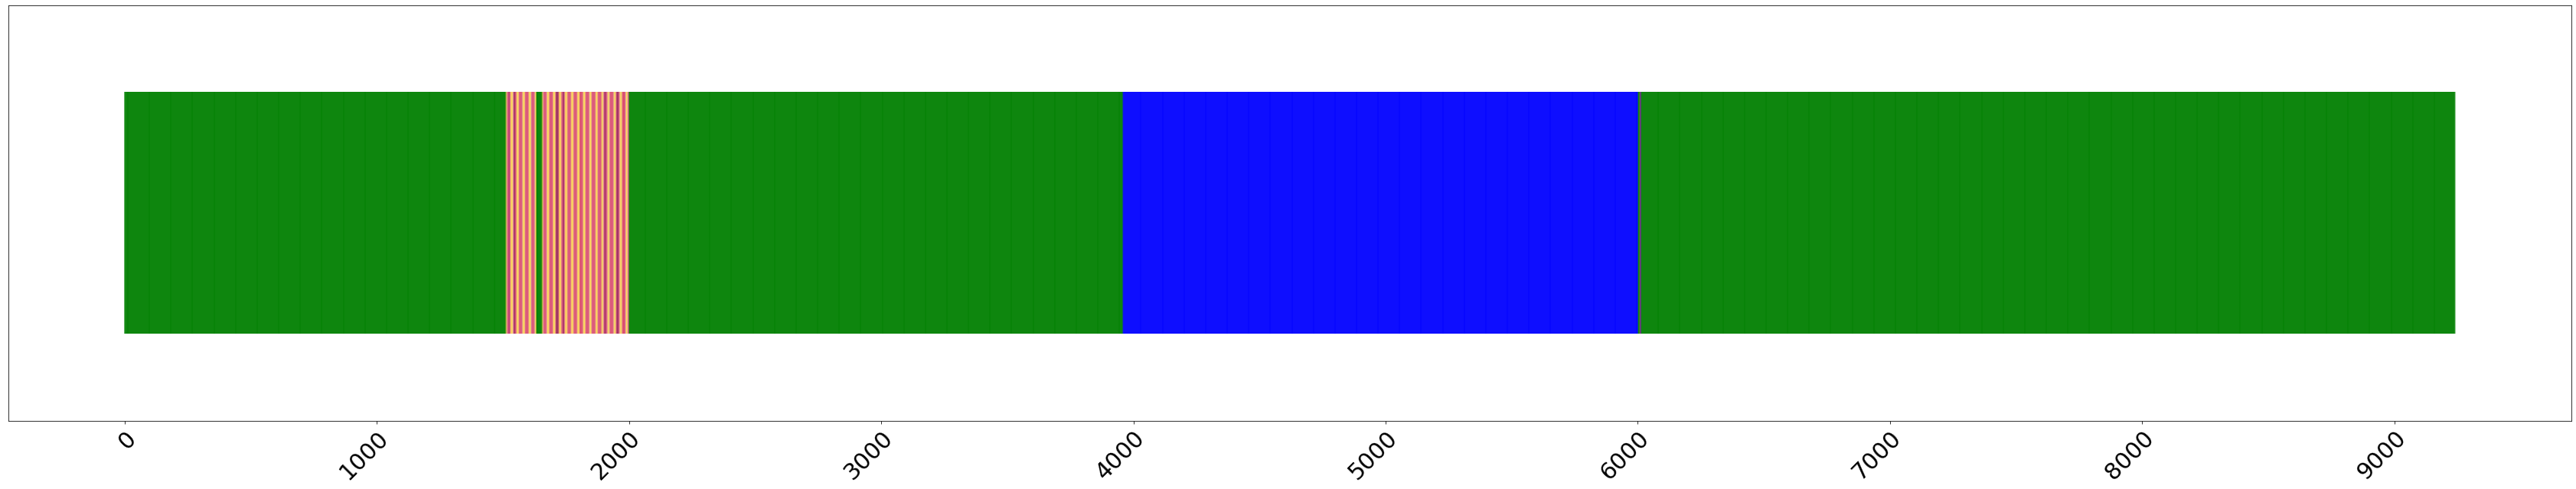

In [74]:
fig, ax = plt.subplots(figsize = (60,10))
plt.ylim(0.99,1.01)
plt.scatter(range(len(df)), idx_bins, c='green', alpha=0.5, marker='|', s=100000)
plt.scatter(range(len(df)), bad_rain_bins, c='blue', alpha=0.5, marker='|', s=100000)
plt.scatter(range(len(df)), systematic_bins, c='purple', alpha=0.1, marker='|', s=100000)
plt.scatter(range(len(df)), temp_bins, c='red', alpha=0.1, marker='|', s=100000) 
plt.scatter(range(len(df)), wind_bins, c='orange', alpha=0.1, marker='|', s=100000)
plt.scatter(range(len(df)), neg_bins, c='gold', alpha=0.1, marker='|', s=100000)
plt.yticks([])
plt.xticks(xticks_locs, xticks_locs)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor", fontsize=30);

So as can be seen on the plot the first big streak of errors from index ~1511 to ~2000 comes from a mixture of errors. Some of the observations have bin removed due to bad temperature measurements, some for bad wind measurements and some for the weird systematic duplication error.

However more interesting we can see that the 3 months of errors comes from being bad rain observations. If we take a look at the plot of the rain data before we removed the rain data we can see that the outliers form some nice gaussian looking distribution. This leads me to suspect that perhaps the weather station was functioning in this time period but maybe the settings was setup differently than the rest of the time?

## Slightly change the time data so it is easier to match

In [75]:
no_nan_df['Time(utc)'] = no_nan_df['Time(utc)'].dt.ceil('h')

/home/mathias/Dropbox/Uni/Speciale/code/nf-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


# Save results

In [76]:
cleaned_file_name = "CleanedClimateStationData.csv"

In [77]:
no_nan_df.to_csv(cleaned_file_name, index=None)